In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json 

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#create lists 
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind_speed = []
date = []
country = []
city_list = []

print("--------Beginning Data Retrieval--------")

for city in cities:
    query_url = url + "&q=" + city
    
    #parse out the information in json
    weather_json = requests.get(query_url).json()

    #wrap it in a try: except: in case there are missing info for some cities
    try:
        #append info to list 
        lat.append(weather_json["coord"]["lat"])
    except: 
        #if there is missing info, add a nan value
        lat.append(np.nan)
        
    try:
        lng.append(weather_json["coord"]["lon"])
    except:
        lng.append(np.nan)
        
    try:
        temp.append(weather_json["main"]["temp"])
    except:
        temp.append(np.nan)
        
    try:
        humidity.append(weather_json["main"]["humidity"])
    except:
        humidity.append(np.nan)
        
    try:
        clouds.append(weather_json["clouds"]["all"])
    except:
        clouds.append(np.nan)
        
    try:
        wind_speed.append(weather_json["wind"]["speed"])
    except:
        wind_speed.append(np.nan)
    
    try:
        date.append(weather_json["dt"])
    except:
        date.append(np.nan)
        
    try:
        country.append(weather_json["sys"]["country"])
    except:
        country.append(np.nan)
        
    try:
        city_list.append(weather_json["name"])
    except:
        city_list.append(np.nan)
    
    #print processing log
    try:
        city_name = weather_json["name"]
        city_id = weather_json["id"]

        print("Processing " + city_name + " | City ID: " + str(city_id))
        print(query_url)
    except KeyError: 
        print("Skipping.. no city information")

print("====================================================")
print("Data Retrieval Complete")
print("====================================================")

--------Beginning Data Retrieval--------
Processing Bullhead City | City ID: 5287565
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=bullhead city
Processing Rikitea | City ID: 4030556
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=rikitea
Processing Kloulklubed | City ID: 7671223
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kloulklubed
Processing Golden | City ID: 5962582
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=golden
Processing Lethem | City ID: 3379316
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=lethem
Processing Laguna | City ID: 4013704
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=laguna
Processing Hammerfest | City ID: 779683
http://api.

Processing Hermanus | City ID: 3366880
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=hermanus
Skipping.. no city information
Processing Yar-Sale | City ID: 1486321
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=yar-sale
Processing Moron | City ID: 3631878
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=moron
Processing Butaritari | City ID: 2110227
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=butaritari
Processing Mehamn | City ID: 778707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mehamn
Processing Tasiilaq | City ID: 3424607
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=tasiilaq
Processing Nikolskoye | City ID: 546105
http://api.openweathermap.org/

Processing Katsuura | City ID: 1865309
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=katsuura
Processing Cuamba | City ID: 1047660
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cuamba
Processing Puerto Quijarro | City ID: 3465342
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=puerto quijarro
Skipping.. no city information
Processing Buraydah | City ID: 107304
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=buraydah
Processing Puerto Ayora | City ID: 3652764
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=puerto ayora
Processing Manturovo | City ID: 529505
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=manturovo
Processing Vardo | City ID: 4372777
http://ap

Processing Zemio | City ID: 235826
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=zemio
Skipping.. no city information
Processing Markala | City ID: 2453662
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=markala
Processing Khuzhir | City ID: 2022143
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=khuzhir
Processing Kindu | City ID: 212902
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kindu
Processing Pevek | City ID: 2122090
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=pevek
Processing Airai | City ID: 1651810
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=airai
Skipping.. no city information
Skipping.. no city information
Processing Itupiranga | City ID

Processing Palu | City ID: 1633034
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=palu
Processing Gotsu | City ID: 1863521
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=gotsu
Processing Makakilo City | City ID: 5850554
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=makakilo city
Processing Komsomolskiy | City ID: 1486910
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=komsomolskiy
Processing Labuhan | City ID: 1641899
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=labuhan
Processing Carballo | City ID: 3126369
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=carballo
Processing Defiance | City ID: 5151861
http://api.openweathermap.org/data/2.5/weather?units=

Processing Namibe | City ID: 3347019
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=namibe
Processing Orange | City ID: 2154219
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=orange
Processing Damavand | City ID: 138042
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=damavand
Processing Turayf | City ID: 101312
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=turayf
Processing Clonakilty | City ID: 2965402
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=clonakilty
Processing Takhtamygda | City ID: 2015707
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=takhtamygda
Skipping.. no city information
Processing Ishigaki | City ID: 1861416
http://api.openweathermap.or

Processing Kavaratti | City ID: 1267390
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=kavaratti
Processing Yatou | City ID: 2225940
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=yatou
Skipping.. no city information
Processing Tiznit | City ID: 2527089
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=tiznit
Processing Ballina | City ID: 2966778
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=ballina
Processing Bathsheba | City ID: 3374083
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=bathsheba
Processing Teknaf | City ID: 1185095
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=teknaf
Skipping.. no city information
Processing Bekabad | City ID: 1514402
http:/

Processing Longyearbyen | City ID: 2729907
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=longyearbyen
Processing Moyale | City ID: 186180
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=moyale
Processing The Valley | City ID: 3573374
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=the valley
Processing Mabini | City ID: 1704597
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=mabini
Processing Basco | City ID: 4863349
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=basco
Processing Zaykovo | City ID: 1485323
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=zaykovo
Skipping.. no city information
Processing Sur | City ID: 286245
http://api.openweathermap.org/data/

Processing Muzhi | City ID: 1498161
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=muzhi
Processing Sabang | City ID: 1691355
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=sabang
Processing Pontianak | City ID: 1630789
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=pontianak
Processing Jardim | City ID: 3460087
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=jardim
Processing Hanyang | City ID: 1798537
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=hanyang
Processing Fomboni | City ID: 921889
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=fomboni
Processing Vila Franca do Campo | City ID: 3372472
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Harper | City ID: 4696310
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=harper
Processing Margate | City ID: 2158744
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=margate
Processing Dauphin | City ID: 5935341
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=dauphin
Processing Khandyga | City ID: 2022773
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=khandyga
Processing Sidi Ali | City ID: 2487130
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=sidi ali
Processing Samarai | City ID: 2132606
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=samarai
Processing Port Blair | City ID: 1259385
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Cayenne | City ID: 3382160
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=cayenne
Processing Naze | City ID: 2337542
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=naze
Skipping.. no city information
Processing Baracoa | City ID: 3567834
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=baracoa
Processing Warangal | City ID: 1252948
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=warangal
Processing Acari | City ID: 3390864
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=acari
Processing Haldibari | City ID: 1270504
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2d7e92e10860a009c99500962a4fc45d&q=haldibari
Processing Beloha | City ID: 1067565
http://api.openweathermap.org/data/2.5/wea

In [4]:
#print it out to see where the required info is located
#print(json.dumps(weather_json,indent=4))

In [5]:
#build data frame
weather_df = pd.DataFrame()
weather_df["City"] = city_list
weather_df["Country"] = country
weather_df["Date"] = date
weather_df["Latitude"] = lat
weather_df["Longitude"] = lng
weather_df["Temperature"] = temp
weather_df["Humidity"] = humidity
weather_df["Cloudiness"] = clouds
weather_df["Wind Speed"] = wind_speed
weather_df.head()


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Bullhead City,US,1.535582e+09,35.15,-114.57,101.93,8.0,40.0,8.05
1,Rikitea,PF,1.535584e+09,-23.12,-134.97,75.22,96.0,0.0,16.49
2,Kloulklubed,PW,1.535579e+09,7.04,134.26,77.00,94.0,75.0,5.82
3,Golden,CA,1.535580e+09,51.30,-116.96,59.00,77.0,90.0,3.36
4,Lethem,GY,1.535584e+09,3.38,-59.80,81.52,69.0,44.0,8.66


In [6]:
#drop nan values in data frame (axis=0 --> dropping rows) (how="any" --> drop the whole row if there is a nan value)
cleaned_weather_df = weather_df.dropna(axis=0,how="any")

#reset index
cleaned_weather_df = cleaned_weather_df.reset_index()

#drop "index" column created while resetting index
new_weather_df = cleaned_weather_df[["City", 
                                     "Country", 
                                     "Date", 
                                     "Latitude", 
                                     "Longitude",
                                     "Temperature", 
                                     "Humidity", 
                                     "Cloudiness", 
                                     "Wind Speed"]]

#format so that date is not displayed in scientific form
pd.options.display.float_format = '{:.2f}'.format

#visualize data frame 
new_weather_df.head(10)


,City,Country,Date,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Bullhead City,US,1535582100.00,35.15,-114.57,101.93,8.00,40.00,8.05
1,Rikitea,PF,1535583552.00,-23.12,-134.97,75.22,96.00,0.00,16.49
2,Kloulklubed,PW,1535579400.00,7.04,134.26,77.00,94.00,75.00,5.82
3,Golden,CA,1535580000.00,51.30,-116.96,59.00,77.00,90.00,3.36
4,Lethem,GY,1535583553.00,3.38,-59.80,81.52,69.00,44.00,8.66
5,Laguna,MX,1535582100.00,27.52,-110.01,75.20,88.00,40.00,10.29
6,Hammerfest,NO,1535581200.00,70.66,23.68,60.80,67.00,0.00,39.15
7,Punta Arenas,CL,1535580000.00,-53.16,-70.91,35.60,74.00,40.00,23.04
8,Albany,US,1535583060.00,42.65,-73.75,88.48,46.00,20.00,10.29
9,Talnakh,RU,1535583554.00,69.49,88.39,39.67,95.00,76.00,14.36


In [17]:
#convert unix timestamp to date
date = time.ctime(new_weather_df["Date"][0])
print(date)

#set variables for plot attributes 
color = "salmon"
edgecolor = "black"
alpha = 1

Wed Aug 29 15:35:00 2018


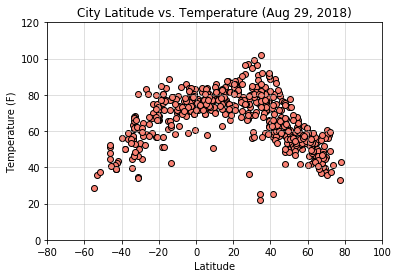

In [18]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Temperature"], 
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(0,120)
plt.xlim(-80,100)
plt.title("City Latitude vs. Temperature (Aug 29, 2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(alpha=0.5)

#save plot to fig
plt.savefig("../Images/temperature.png")

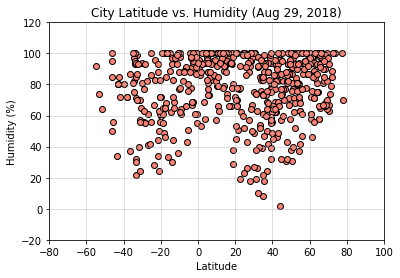

In [19]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Humidity"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (Aug 29, 2018)")
plt.grid(alpha=0.5)
plt.savefig("../Images/humidity.png")

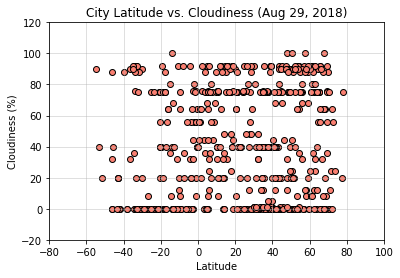

In [20]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Cloudiness"], 
    facecolor=color, 
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (Aug 29, 2018)")
plt.grid(alpha=0.5)
plt.savefig("../Images/cloudiness.png")

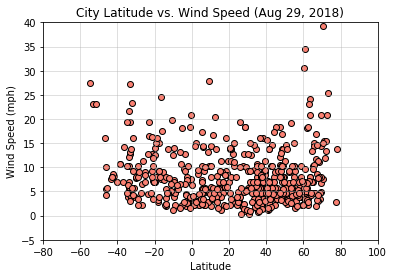

In [21]:
plt.scatter(
    new_weather_df["Latitude"],
    new_weather_df["Wind Speed"],
    facecolor=color,
    edgecolor=edgecolor,
    alpha=alpha)
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (Aug 29, 2018)")
plt.grid(alpha=0.5)
plt.savefig("../Images/windspeed.png")